In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
full_music_data=pd.read_csv('full_music_data.csv')
full_music_data.head()

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.0672,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.0136,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.0156,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.1080,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.2760,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me


#### artist_ name:表演曲目的艺术家。(数组) 
#### artist_ id: influence_ data.csv 文件中提供了相同的唯一标识号。 (数字字符串)音乐特征:
#### danceability:根据节奏，节奏稳定性，拍子强度和整体规律性等音乐元素的组合来衡量音轨适合跳舞的方式。值0.0最低可跳舞，而1.0最高可跳舞。(浮 点数)
#### energy:表示对强度和活动的感知的量度。值0.0最小强度/能量，而1.0强度最大/能量。通常，充满活力的曲目会感觉快速，响亮且嘈杂。例如，死亡金属具有较高的能量,而巴赫前奏的得分则较低。有助于此属性的感知特征包括动态范围，感知的响度，音色，发作率和一般熵。(浮点数)
#### valence:一种描述曲目传达的音乐积极性的量度。值0.0最负，1.0最正。价态高的音轨听起来更积极(例如，快乐，开朗，欣快)，而价态低的音轨听起来更负面(例如，悲伤，沮丧，愤怒)。(浮点数)
#### tempo:曲目的总体估计拍速，以每分钟拍数(BPM)为单位。用音乐术语来说，节奏是指给定乐曲的速度或节奏，它直接来自平均拍子持续时间。(浮点数)
#### loudness:整体响度，以分贝(dB) 为单位。值的典型范围是-60至0db。响度值是整个音轨的平均值，可用于比较音轨的相对响度。响度是声音的质量，它是身体力量(振幅)的主要心理关联。(浮点数)
#### mode:音轨的模态(主要或次要)的指示，其旋律内容所源自的音阶类型。Major以1表示，minor为0。
#### key:曲目的估计总体音调。整数使用标准音高类别符号映射到音高。例如。0=C，1=C#/Db， 2=D,依此类推。如果未检测到音调，则音调的值为-1。(整数)
### 音乐类型.
#### acousticness:音轨是否是声学的置信度度量( 无技术增强或电放大)。值1.0表示音轨是声学的高置信度。(浮点数)
#### instrumentalness:预测曲目是否不包含人声。在这种情况下，“Ooh”和“ah"的声音被视为乐器。说唱或口语 单词轨迹显然是“声音”。器乐性值越接近1.0,则曲目中没有人声内容的可能性越大。高于0.5的值旨在表示乐器音轨，但随着该值接近1.0，置信度更高。(浮点数)
#### liveness:检测音轨中是否有观众的存在。较高的活跃度值表示增加了实时执行音轨的可能性。高于0.8的值很可能会显示该音轨处于活动状态。(浮点数)
#### speechiness:检测音轨中口语的存在。与录音类似的语音内容(例如脱口秀,有声读物，诗歌)越多，属性值就越接近1.0。大于0.66的值描述的曲目可能完全由口语组成。介于0.33到0.66之间的值描述了可能同时包含音乐和语音的曲目，无论是分段还是分层的(包括说唱音乐厂。低于0.33的值最有可能代表音乐和其他非语音类曲目。(浮 点数) 7”
#### explicit:检测曲目中的显式歌词(true(1) =是; false (0) =no，它不是OR未知)。(布尔值)
描述:
#### duration_ ms:音轨的持续时间(以毫秒为单位)。(整数)
#### popularity:这首歌的受欢迎程度。该值将在0到100之间，其中100是最受欢迎的值。受欢迎程度是通过算法计算的，并且在很大程度上取决于音轨的总播放次数以及这些播放的最近时间。一般而言，现在播放频率更高的歌曲将比过去播放频率更高的歌曲具有更高的知名度。重复曲目(例如，同一首曲目和一-张专辑中的同一.曲目)将被独立评估。艺术家和专辑的流行度是从曲目流行度中数学得出的。(整数)
#### year:发行曲目的年份。(1921年至2020年的整数)
#### release_ _date: 曲目发布的日历日期主要是yyyy-mm-dd格式，但是日期的精度可能会有所不同，有些只是以yyyy给出。
#### song_ title (censored):曲目的名称。(字符串)已运行软件以删除歌曲标题中的任何潜在显式单词。
#### count: full music_ data.csv 文件中表示特定艺术家的歌曲数。(整数)


In [7]:
influence_data=pd.read_csv('influence_data.csv')
influence_data.head()

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990


In [8]:
full_music_data.shape

(98340, 19)

In [9]:
influence_data['influencer_main_genre'].unique()

array(['Pop/Rock', 'Electronic', 'Reggae', 'Jazz', 'Country',
       'Comedy/Spoken', 'R&B;', 'Classical', 'Latin', 'Vocal', 'Folk',
       'Easy Listening', 'International', 'Avant-Garde', 'Blues',
       'Stage & Screen', 'New Age', 'Religious', "Children's", 'Unknown'],
      dtype=object)

In [10]:
data_map={}
for i in influence_data['influencer_name'].unique():
    data_map[i]=influence_data[influence_data['influencer_name']==i].iloc[0,2]

In [11]:
import numpy as np
def getinfluencer_main_genre(x):
    x=eval(x)
    if len(x)==1:
        try:
            return data_map[x[0]]
        except:
            return np.NaN
    else:
        return np.NaN
full_music_data['genre']=full_music_data['artist_names'].apply(lambda x :getinfluencer_main_genre(x))

In [12]:
full_music_data.isnull().sum()

artist_names                 0
artists_id                   0
danceability                 0
energy                       0
valence                      0
tempo                        0
loudness                     0
mode                         0
key                          0
acousticness                 0
instrumentalness             0
liveness                     0
speechiness                  0
explicit                     0
duration_ms                  0
popularity                   0
year                         0
release_date                 0
song_title (censored)        0
genre                    18619
dtype: int64

In [13]:
full_music_data.dropna(inplace=True)

In [14]:
full_music_data.isnull().sum()

artist_names             0
artists_id               0
danceability             0
energy                   0
valence                  0
tempo                    0
loudness                 0
mode                     0
key                      0
acousticness             0
instrumentalness         0
liveness                 0
speechiness              0
explicit                 0
duration_ms              0
popularity               0
year                     0
release_date             0
song_title (censored)    0
genre                    0
dtype: int64

In [15]:
full_music_data.head()

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.0672,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.0136,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.0156,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.1080,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.2760,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;


In [16]:
full_music_data.columns

Index(['artist_names', 'artists_id', 'danceability', 'energy', 'valence',
       'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness',
       'liveness', 'speechiness', 'explicit', 'duration_ms', 'popularity',
       'year', 'release_date', 'song_title (censored)', 'genre'],
      dtype='object')

In [17]:
full_music_data_temp=full_music_data[['genre','song_title (censored)','artists_id', 'danceability', 'energy', 'valence',
       'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness',
       'liveness', 'speechiness', 'explicit', 'duration_ms', 'popularity',
       'year']]

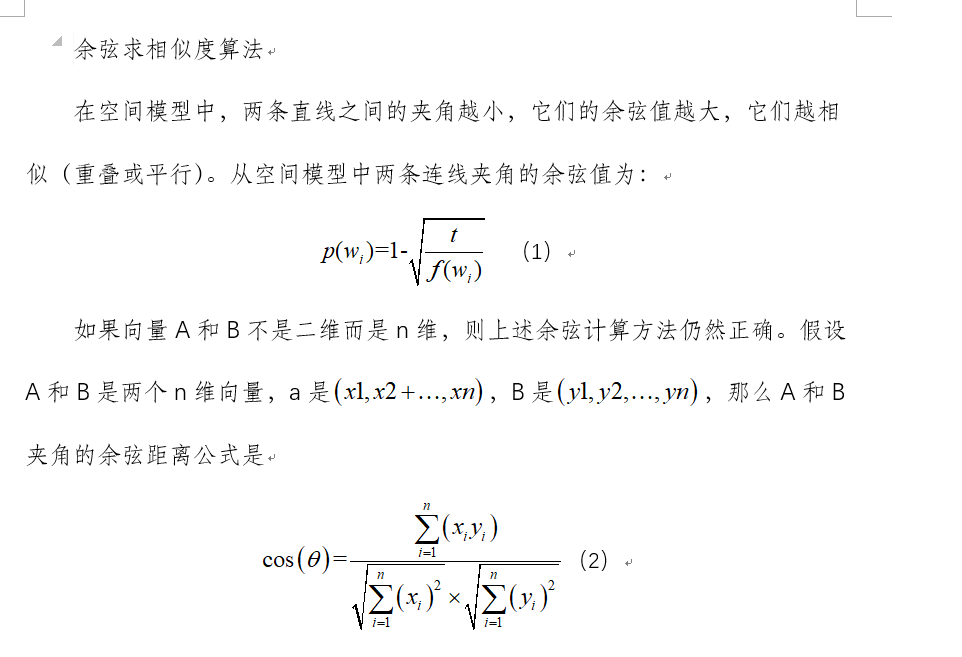

In [18]:
import numpy as np


def cos_sim(vector_a, vector_b):
    """
    计算两个向量之间的余弦相似度
    :param vector_a: 向量 a 
    :param vector_b: 向量 b
    :return: sim
    """
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    sim = 0.5 + 0.5 * cos
    return sim

In [19]:
full_music_data_temp['genre'].unique()

array(['Electronic', 'R&B;', 'Vocal', 'Religious', 'Pop/Rock', 'Blues',
       'Country', 'Jazz', 'Folk', 'Reggae', 'Latin', 'International',
       'Comedy/Spoken', 'Easy Listening', 'Classical', 'Avant-Garde',
       'New Age', 'Stage & Screen', "Children's", 'Unknown'], dtype=object)

In [20]:
full_music_data_temp=full_music_data_temp[full_music_data_temp['genre']!='Unknown'].reset_index(drop=True)

In [21]:
full_music_data_temp.isnull().sum()

genre                    0
song_title (censored)    0
artists_id               0
danceability             0
energy                   0
valence                  0
tempo                    0
loudness                 0
mode                     0
key                      0
acousticness             0
instrumentalness         0
liveness                 0
speechiness              0
explicit                 0
duration_ms              0
popularity               0
year                     0
dtype: int64

In [28]:
data_list=[]
genreunique=full_music_data_temp['genre'].unique()
for each_i in range(len(genreunique)):
    for each_j in range(each_i,len(genreunique)):
        
        temp_each_i=full_music_data_temp[full_music_data_temp['genre']==genreunique[each_i]].drop_duplicates(['song_title (censored)'], keep='last').reset_index(drop=True)
        temp_each_j=full_music_data_temp[full_music_data_temp['genre']==genreunique[each_j]].drop_duplicates(['song_title (censored)'], keep='last').reset_index(drop=True)
        
        
        
        for i in ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key',
           'acousticness', 'instrumentalness', 'liveness', 'speechiness',
           'duration_ms', 'popularity', 'year']:
            temp_each_i[i]=(temp_each_i[i]-temp_each_i[i].min())/(temp_each_i[i].max()-temp_each_i[i].min())
            temp_each_j[i]=(temp_each_j[i]-temp_each_j[i].min())/(temp_each_j[i].max()-temp_each_j[i].min())
            
        N=10
        temp_each_i=temp_each_i.sample(n=N,replace=True).reset_index(drop=True)
        temp_each_j=temp_each_j.sample(n=N,replace=True).reset_index(drop=True)
        for i in range(N):
            for j in range(N):
                data_list.append([temp_each_i.iloc[i,0],temp_each_j.iloc[j,0],temp_each_i.iloc[i,1],temp_each_j.iloc[j,1],cos_sim(temp_each_i.iloc[i,3:],temp_each_j.iloc[j,3:])])

In [29]:
data_list=pd.DataFrame(data_list)
data_list.columns=['genre1','genre2','song1','song2','sim']
data_list

,genre1,genre2,song1,song2,sim
0,Electronic,Electronic,Time To Find Me (AFX Fast Mix),We Are the Music Makers,0.937250
1,Electronic,Electronic,Time To Find Me (AFX Fast Mix),Day Tripper,0.880438
2,Electronic,Electronic,Time To Find Me (AFX Fast Mix),Avril ****,0.846384
3,Electronic,Electronic,Time To Find Me (AFX Fast Mix),IZ-US,0.953808
4,Electronic,Electronic,Time To Find Me (AFX Fast Mix),Rock 'n' Roll (Will Take You to the Mountain),0.778965
...,...,...,...,...,...
18995,Children's,Children's,The Chipmunk Song (Christmas Don't Be Late),Up On The House-Top,0.936173
18996,Children's,Children's,The Chipmunk Song (Christmas Don't Be Late),Chipmunk Fun,0.950857
18997,Children's,Children's,The Chipmunk Song (Christmas Don't Be Late),Alvin's Harmonica,0.903042
18998,Children's,Children's,The Chipmunk Song (Christmas Don't Be Late),It's Beginning To Look A Lot Like Christmas,0.958148


In [4]:
(1+8000)*8000/2

32004000.0

In [31]:
data_list.to_csv('sim.csv',index=None)

In [32]:
map_={}
for i,j in enumerate(full_music_data_temp['genre'].unique()):
    map_[j]=i
map_
full_music_data_temp['genre_']=full_music_data_temp['genre'].map(map_)

map_={}
for i,j in enumerate(full_music_data_temp['artists_id'].unique()):
    map_[j]=i
map_
full_music_data_temp['artists_id_']=full_music_data_temp['artists_id'].map(map_)

In [35]:
len(full_music_data_temp['genre'].unique())

19

In [36]:
len(full_music_data_temp['artists_id'].unique())

3528

In [33]:

full_music_data_temp

,genre,song_title (censored),artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,genre_,artists_id_
0,Electronic,Ernie,[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.06720,0.585000,0.0921,0.0498,0,437200,54,2005,0,0
1,Electronic,Wandering Eye,[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.01360,0.148000,0.0993,0.1310,0,581008,53,2005,0,0
2,Electronic,The Raft,[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.01560,0.345000,0.3060,0.0377,0,431293,55,2009,0,0
3,R&B;,All True Man,[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.10800,0.000031,0.0935,0.0389,0,304427,34,1991,1,1
4,R&B;,(What Can I Say) To Make You Love Me,[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.27600,0.000001,0.2870,0.0390,0,264933,37,1987,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79714,Pop/Rock,Jailhouse Rock - **** Remaster,[690254],0.276,0.892,0.715,80.475,-7.035,1,11,0.40900,0.000000,0.7140,0.0893,0,115973,33,1975,4,3527
79715,Pop/Rock,It's Only Love,[690254],0.700,0.592,0.906,109.847,-10.434,1,11,0.10800,0.018400,0.1180,0.0681,0,263627,32,1976,4,3527
79716,Pop/Rock,Balinese,[690254],0.709,0.709,0.863,111.544,-12.023,1,2,0.11800,0.000011,0.1250,0.0370,0,158400,31,1987,4,3527
79717,Pop/Rock,La Grange - **** Remaster,[690254],0.552,0.651,0.533,161.548,-10.624,0,4,0.00494,0.034900,0.1320,0.2290,0,232533,43,1992,4,3527


In [37]:
full_music_data_temp.to_csv('full_music_data_temp.csv',index=None)